In [1]:
# Import package
import tweepy
import json

# Store OAuth authentication credentials in relevant variables
access_token = "942826764967010304-2Vy2mPykwdJXr4ZReCceiKzh0s3m3Me"
access_token_secret = "fU5USywwdEPFPX9nvJrbm31EBjsjunFrQvgiyzr4KxQMs"
consumer_key = "H9c7wnPsjvrFRSjIoHVcrToJb"
consumer_secret = "uLm2ye9FIHl0VFfvrj58xLUA88s3zdFcaMuVgYha0uNzSDjDVU"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [2]:
# Replace the API_KEY and API_SECRET with your application's key and secret.
# Use AppAuthHandler instead of OAuthHandler to get higher limits.
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

with open(tweets_data_path, 'w') as f:
    for tweet in tweepy.Cursor(api.search,
                               q='dataanalysis OR dataanalytics OR #ai',
                               count=100,
                               since='2017-12-20',
                               until='2017-12-27', 
                               lang="en").items():
        f.write(json.dumps(tweet._json) + '\n')

Rate limit reached. Sleeping for: 527
Rate limit reached. Sleeping for: 703
Rate limit reached. Sleeping for: 693
Rate limit reached. Sleeping for: 672
Rate limit reached. Sleeping for: 676
Rate limit reached. Sleeping for: 693


In [21]:
# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys()) 

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [22]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'id'])

# Print head of DataFrame
print(df.head())

                                                text                  id
0  RT @VTSolOrg: New Cumulative Percentage charts...  945806397282844672
1  @SamsungBizUSA you should acquire $KOPN asap b...  945806374042206210
2  Alexa, please read 1984 by George Orwell to me...  945806349501218816
3  The latest The Marlene Wright Daily! https://t...  945806337845456896
4  RT @AccentureASEAN: #AI can add up to US$215 b...  945806306031501312


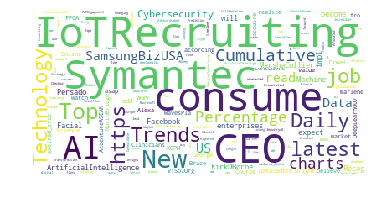

In [31]:
# Import package
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Build a word cloud

# #mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
# mpl.rcParams['font.size']=12                #10 
# mpl.rcParams['savefig.dpi']=100             #72 
# mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
stopwords.add('RT')
stopwords.add('MikeQuindazzi')

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=2000,
                          max_font_size=80, 
                          random_state=42,
                          collocations=False
                         ).generate(str(df.text))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

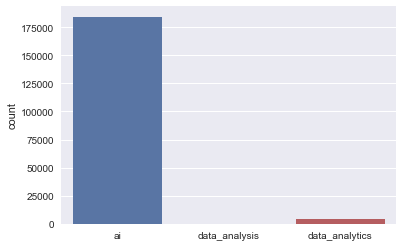

In [24]:
# Import packages
import seaborn as sns
import re
%matplotlib inline

# whether the first argument (a word) occurs within the 2nd argument (a tweet).
def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[ai, data_analysis, data_analytics] = [0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    ai += word_in_text('ai', row['text'])
    data_analysis += word_in_text('dataanalysis', row['text'])
    data_analytics += word_in_text('dataanalytics', row['text'])
    


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['ai', 'data_analysis', 'data_analytics']

# Plot histogram
ax = sns.barplot(cd, [ai, data_analysis, data_analytics])
ax.set(ylabel="count")
plt.show()

In [25]:
data_analysis

208